GPUで実行してね！

## Installation-1m

In [ ]:
!pip install -qq pyannote.audio==3.1.1
!pip install -qq ipython==7.34.0

# Upload file

In [ ]:
# input-2

import google.colab
from pyannote.audio import Audio
import IPython.display as ipd
import soundfile as sf
from pyannote.core import Segment, notebook

# ファイルをアップロード
own_file, _ = google.colab.files.upload().popitem()
OWN_FILE = {'audio': own_file}
notebook.reset()

# 分離フェーズ

In [ ]:
# 音声をいろいろする
import torchaudio

waveform, sample_rate = torchaudio.load(OWN_FILE['audio'])
mono = waveform.shape[0] == 1

audio = Audio(sample_rate=sample_rate, mono=mono)

トークン！！！

In [ ]:
# traning済みpipeline
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization-3.1",use_auth_token="**token**")

import torch
if torch.cuda.is_available():
  pipeline.to(torch.device('cuda'))

#これすると100倍くらい早くなる
waveform, sample_rate = torchaudio.load(OWN_FILE['audio'])

# num_speakers=5
from pyannote.audio.pipelines.utils.hook import ProgressHook
with ProgressHook() as hook:
  diarization = pipeline({"waveform": waveform, "sample_rate": sample_rate}, hook=hook, num_speakers=3)

That's it? Yes, that's it :-)

# visual

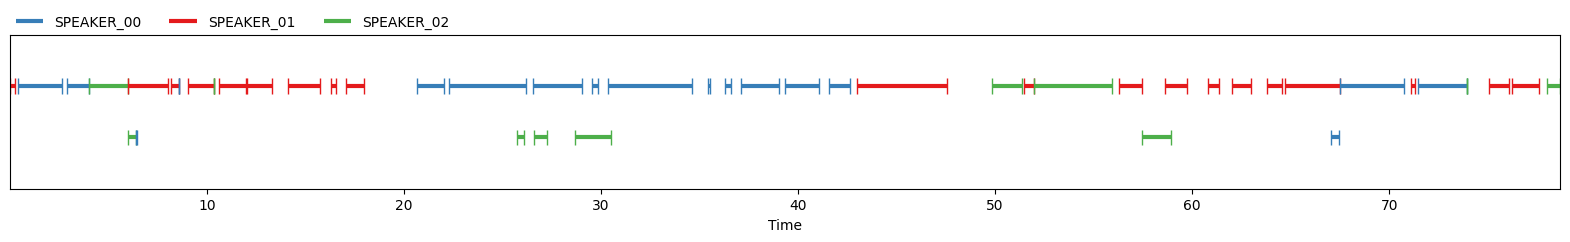

In [ ]:
diarization

箇条書きというか

In [ ]:
# for turn, _, speaker in diarization.itertracks(yield_label=True):
#     print(f"start={turn.start:.1f}s stop={turn.end:.1f}s speaker_{speaker}")

#  whisper installとか (3m..?)

In [ ]:
# 必要に応じて
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install git+https://github.com/openai/whisper.git

In [ ]:
import whisper
# DL1分
# model = whisper.load_model("medium")
# DL3分
model = whisper.load_model("large-v3")

# whisper 実行

In [ ]:
from pyannote.audio import Audio

audio_file = OWN_FILE['audio']

# diarize_result = model.transcribe(audio_file,language="ja")

audio = whisper.load_audio(audio_file)

for segment in diarization.itertracks(yield_label=True):
    start_time = segment[0].start
    end_time = segment[0].end
    speaker = segment[2]

    # スキップ処理
    if end_time - start_time < 1.0:
        continue

    segment_audio = audio[int(start_time * 16000):int(end_time * 16000)]
    result = model.transcribe(segment_audio, language="ja")
    text = result['text']

    print(f"{start_time:.2f} - {end_time:.2f} {speaker}: {text}")